# Actividad 10: Solución Numérica de Ecuaciones Diferenciales Parciales

Librerías utilizadas.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ejercicio 1.

   Caso a)

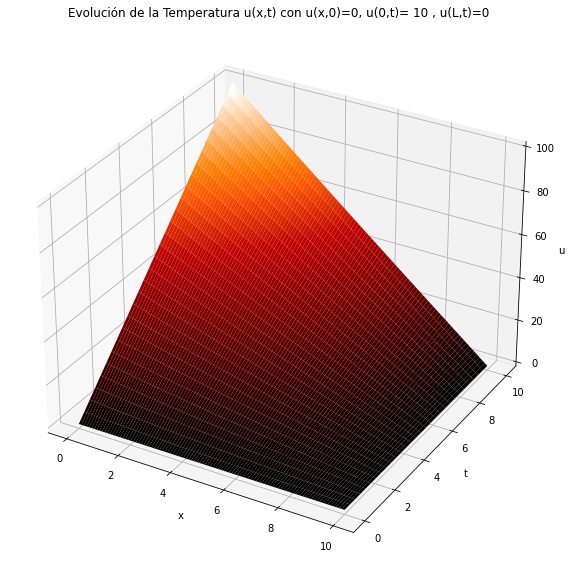

In [12]:
def odefunc(u, t):
    dudt = np.zeros(x0.shape)
    dudt[0] = 10
    dudt[-1] = 0
    kappa=100
    for i in range(1, N-1):
        dudt[i] = kappa*(u[i + 1] - 2*u[i] + u[i - 1]) / h**2
    return dudt

a = 0
b = 10

t0 = 0
tf = 10.0

N=100

h = (b-a)/(N-1)

x = np.linspace(a, b, N);

x0 = 0*x
x0[x0 < 0] = 0

tspan = np.linspace(t0, tf, 30);

sol = odeint(odefunc, x0, tspan)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

SX, ST = np.meshgrid(x, tspan)
ax.plot_surface(SX, ST, sol, cmap='gist_heat', rstride=1, cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.set_title('Evolución de la Temperatura u(x,t) con u(x,0)=0, u(0,t)= 10 , u(L,t)=0')
plt.show()

   Caso b)

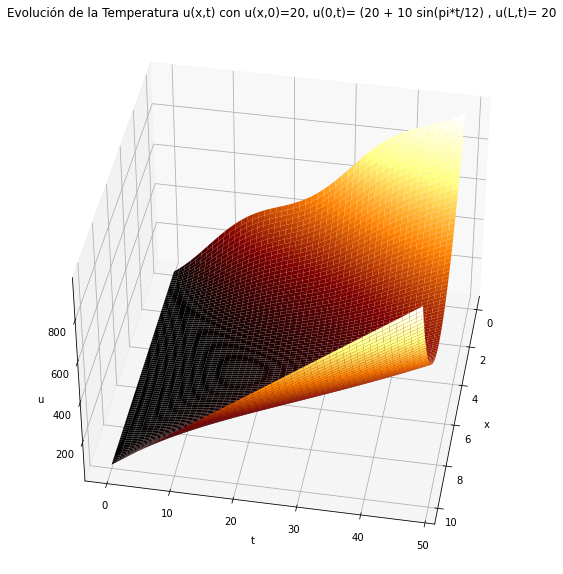

In [19]:
def odefunc1(u, t):
    dudt1 = np.zeros(x0.shape)

    dudt1[0] = 20 + (10*np.sin(np.pi*t/12))
    dudt1[-1] = 20

    kappa = 0.25
   
    for i in range(1, N-1):
        dudt1[i] = kappa*(u[i + 1] - 2*u[i] + u[i - 1]) / h**2
    return dudt1

a = 0
b = 10

t0 = 0
tf = 48.0

N = 100

h = (b-a)/(N-1)

x = np.linspace(a, b, N);

x0 = 0*x+20
x0[x0 < 0] = 0

tspan = np.linspace(t0, tf, 50);

sol2 = odeint(odefunc1, x0, tspan)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

SX, ST = np.meshgrid(x, tspan)
ax.plot_surface(SX, ST, sol2, cmap='afmhot', rstride=1, cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.view_init(elev=40, azim=10)
ax.set_title('Evolución de la Temperatura u(x,t) con u(x,0)=20, u(0,t)= (20 + 10 sin(pi*t/12) , u(L,t)= 20')
plt.show()

# Ejercicio 2.

dt/dx**2 < 0.5? 46.08


<ipython-input-3-9df88df0a19e>:38: UserWarning: The following kwargs were not used by contour: 'lw'
  ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
<ipython-input-3-9df88df0a19e>:39: UserWarning: The following kwargs were not used by contour: 'lw'
  ax.contour(T, X, U, 10, lw=1, cmap="Reds", linestyles="solid", offset=10)


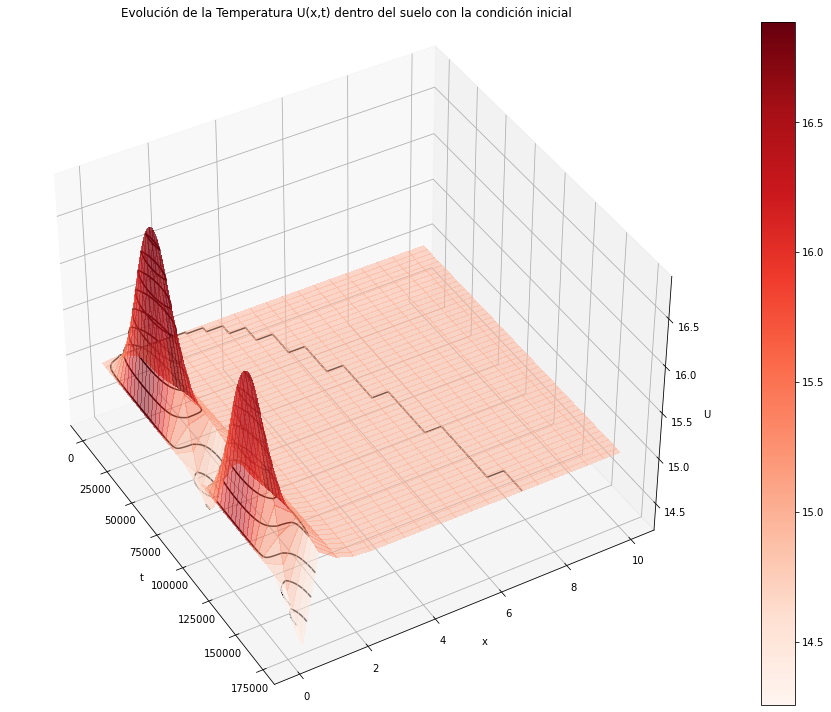

In [3]:
M = 21
N = 15001

x0 = 0
xL = 10 

t0 = 0
tf = 172800 

dx = (xL-x0) / (M-1) 
dt = (tf-t0) / (N-1) 
print('dt/dx**2 < 0.5?', dt/dx**2)

kappa = 1*10**(-6) 

alpha = kappa * dt / dx**2 

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tf, N)
U = np.zeros((M, N))

U[:,0] = 15.0*np.ones(xspan.shape)

for k in range(0, N-1):
    t=k*dt
    U[0, :] = 15 + 20*np.sin(2*np.pi*t/86400)
    U[-1, :] = 15
    for i in range(1, M-1):
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

T, X = np.meshgrid(tspan, xspan)
fig = plt.figure(figsize=(20,10))

ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='Reds',
                       linewidth=0.01, antialiased=False, alpha=0.5)

ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, U, 10, lw=1, cmap="Reds", linestyles="solid", offset=10)

m = plt.cm.ScalarMappable(cmap='Reds')
m.set_array(U)
plt.colorbar(m)

ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) dentro del suelo con la condición inicial ')

ax.view_init(elev=40, azim=-30)

plt.tight_layout()
plt.show()